In [ ]:
import nltk
import numpy as np

# Text Manipulation

## Gutenberg Corpus
This is a dataset of text from over 3000 books, NLTK has some of the books included in it, if you want you can download the entire dataset and use it with NLTK too!
Punkt is a tool needed for sentence tokenization

In [ ]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import gutenberg

In [ ]:
print("List of Gutenberg books that NLTK include")
print(gutenberg.fileids())

List of Gutenberg books that NLTK include
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [ ]:
print("How to access text from a gutenberg book")
print("You need to use the same name as in the file ids above")
austen_emma_name = gutenberg.fileids()[0]

How to access text from a gutenberg book
You need to use the same name as in the file ids above


In [ ]:
print("The book is not loaded all at once, it is a stream, however, you can still iterate over the text like a list, if you want to display a certain number of elements from the stream (words, characters or sentences depending on what you choose) you will have to cast it to a list")

austen_emma_words = gutenberg.words(austen_emma_name)
" ".join(list(austen_emma_words[:500]))

The book is not loaded all at once, it is a stream, however, you can still iterate over the text like a list, if you want to display a certain number of elements from the stream (words, characters or sentences depending on what you choose) you will have to cast it to a list


"[ Emma by Jane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her . She was the youngest of the two daughters of a most affectionate , indulgent father ; and had , in consequence of her sister ' s marriage , been mistress of his house from a very early period . Her mother had died too long ago for her to have more than an indistinct remembrance of her caresses ; and her place had been supplied by an excellent woman as governess , who had fallen little short of a mother in affection . Sixteen years had Miss Taylor been in Mr . Woodhouse ' s family , less as a governess than a friend , very fond of both daughters , but particularly of Emma . Between _them_ it was more the intimacy of sisters . Even before Miss Taylor had ceased to hold the nominal office of gove

In [ ]:
austen_emma_sents = gutenberg.sents(austen_emma_name)
for sentence in austen_emma_sents[:10]:
    print(sentence)

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']
['VOLUME', 'I']
['CHAPTER', 'I']
['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.']
['Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supp

In [ ]:
austen_emma_raw = gutenberg.raw(austen_emma_name)
print(austen_emma_raw[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

# Preprocessing
Before we can do any analysis on our dataset, we need to clean the text to prepare it for analysis

**Note:** these steps are not always done for every NLP task, it all depends on the problem you are trying to solve and how you are going to solve it!

## 1. Lowecase Text

First step that is nearly always done is to make all text lowercase. This is because "hello" is not equal to "Hello" or "HELLO" and typically we want them to represent the same thing. 

However, if your dataset consists of tweets and you wanted to classify them as either having a positive or negative sentiment you might want to differenciate between words that are capitalized differently, for example, text all in upper case can be seen as angry or aggresive in a tweet. This is why spending time to look at your data and understand the problem you are trying to solve is really important.

In [ ]:
lowercase_text = austen_emma_raw.lower()
print(lowercase_text[:200])

[emma by jane austen 1816]

volume i

chapter i


emma woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; an


## 2. String Tokenization

As we saw with the nltk corpus, they provide us with the text already broken up into a list of sentences and a list of words. This is not always the case and we have to do that manually.

**Sentence tokenization** breaks up a string into a list of sentences

**word tokenization** breaks up a string into a list of words

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

lets tokenize the entire book into a list of sentences and into a list of words

In [ ]:

tokenized_sents = sent_tokenize(lowercase_text)
print("List of sentences")
tokenized_sents[:10]

List of sentences


['[emma by jane austen 1816]\n\nvolume i\n\nchapter i\n\n\nemma woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "she was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "sixteen years had miss taylor been in mr. woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of emma.",
 'between _them_ it was more the intimacy\nof sisters.',
 "even before miss taylor had ceased to hold the nominal

In [ ]:
tokenized_words = word_tokenize(lowercase_text)
print("List of words")
print(tokenized_words[:50])

List of words
['[', 'emma', 'by', 'jane', 'austen', '1816', ']', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with']


## 3. Removing Punctuation

Have you noticed that punctuation is considered its own word after word tokenization?

Is this a problem? 
Again, it depends on the problem you are trying to solve! Typically it is removed but it could be useful in your dataset. Using the previous example of positive and negative tweets, there might be emogis which help classify a tweets, or even a full stop at the end that can be seen as passive agressive. 

**Always look at the data and if you are not sure try with and without punctuation!**

Luckily Python provides us with a string of all punctuation which makes it easier for us to remove them. We may decide to change this string to exclude some punctuation that we think is important for our problem

In [ ]:
from string import punctuation
punctuation_set = set(punctuation)
print(punctuation_set)

{')', '&', '$', '}', '{', '!', '-', '^', '.', "'", '~', '%', '@', '>', '(', '?', '`', ';', ']', '|', ',', '<', '=', '*', '#', '"', '+', '\\', '_', '/', ':', '['}


In [ ]:
punctuation_removed = []
for word in tokenized_words:
    if word not in punctuation_set:
        punctuation_removed.append(word)

print(punctuation_removed[:20])

['emma', 'by', 'jane', 'austen', '1816', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and']


This is a cleaner way of writing the above code

In [ ]:
punctuation_removed = [word for word in tokenized_words if word not in punctuation_set]
print(punctuation_removed[:20])

['emma', 'by', 'jane', 'austen', '1816', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and']


## 4. Remove Stopwords

Stopwords are words that do not add meaning to a sentence, they are filler words. Therefore, we remove stopwords a lot of the time, however, in other situatuons where grammar is important, this is kept, it all depends on the problem you are trying to solve and how you intend on approaching it.

NLTK has a list of stopwords for many languages, and we will remove any word that is in the English list of stopwords.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')
spanish_stopwords = stopwords.words('spanish')


print("First 20 English stopwords\n", english_stopwords[:20])
print("\nFirst 20 Spanish stopwords\n", spanish_stopwords[:20])

First 20 English stopwords
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']

First 20 Spanish stopwords
 ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


In [ ]:
stopwords_removed = []

for word in punctuation_removed:
    if word not in english_stopwords:
        stopwords_removed.append(word)
        
print(stopwords_removed[:20])

['emma', 'jane', 'austen', '1816', 'volume', 'chapter', 'emma', 'woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence']


## 5. Stemming and Lemmatization

Should the word "be" and "am" be represented as the same word? 

In some cases, yes, because it is a conjugated form of a verb but the meaning of the word is the same (except the tense and person). In other situatuons where grammar is important this is kept, it all depends on the task at hand.

There are to different approaches to this, stemming and lemmatization.

**Stemming** takes a word and cuts off the ending to return the stem or root of a word.

**Lemmatization** takes a word and returns the base or dictionary form of a word.

Whats important to remember is that it doesnt matter if the returned word is an actualy word, its that all words that all the words mapped to a resultant word are all grammatical forms of the same word and that it does not leave out any grammatical forms. 

For the purpose of this workshop we will use stemming.

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
stemmed_words = []

for word in stopwords_removed:
    stem = stemmer.stem(word)
    stemmed_words.append(stem)

print(stemmed_words[:20])

['emma', 'jane', 'austen', '1816', 'volum', 'chapter', 'emma', 'woodhous', 'handsom', 'clever', 'rich', 'comfort', 'home', 'happi', 'disposit', 'seem', 'unit', 'best', 'bless', 'exist']


## Task:

Write a function that takes in a string of text and applies all of the preprocessing steps discussed above to return a list of preprocessed words from the text. Try run it on the *austen_emma_raw* text

This includes making the text lower case, performing word tokenization, removing punctuation and stop words and stemming the words

In [1]:
def preprocessing(text):
    preprocessed_words = []
    
    # INSERT YOUR SOLUTION HERE
    # There is a file called preprocessing_solution.py that has the correct solution to compare

    return preprocessed_words

In [ ]:
preprocessing(austen_emma_raw)[:20]

['emma',
 'jane',
 'austen',
 '1816',
 'volume',
 'chapter',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessings',
 'existence']

# TensorFlow

TensorFlow is one of the most popular open source platforms for machine learning and deep learning models. We are going to train a model to determine whether a Yelp review is positive or negative. This is to give you an overview of what is possible with NLP, do not focus too much on what each individual part means, its to get an overview. Please do ask questions if you are confused by anything!

We are going to use a subset of the dataset constructed by Xiang Zhang which was extracted from the Yelp Dataset Challenge 2015.

## Download the dataset

In Google Colab, click on the files tab on the left and upload the train_workshop.csv and test_workshop.csv files.



## Read the files

In [ ]:
def read_reviews(file_name):
    reviews = []
    labels = []

    with open(file_name, "r") as f:
        count = 0
        for line in f.read().split("\n"):
            if not line:
                break;
            columns = [column.strip() for column in line.split(",")]
            reviews.append(columns[0])
            labels.append(int(columns[1]))

            count += 1
        print(count)

    return reviews, np.array(labels)

In [ ]:
train_reviews, train_labels = read_reviews("train_workshop.csv")
test_reviews, test_labels = read_reviews("test_workshop.csv")

40000
12000


These assertions are to ensure that the data was read correctly

In [ ]:
assert len(train_reviews) == 40_000, "Incorrect number of train reviews"
assert len(train_labels) == 40_000, "Incorrect number of train labels"

assert len(test_reviews) == 12_000, "Incorrect number of test reviews"
assert len(test_labels) == 12_000, "Incorrect number of test labels"

## Apply Preprocessing Steps to Dataset

In [ ]:
train_reviews_preprocessed = []
for review in train_reviews:
    train_reviews_preprocessed.append(preprocessing(review))

test_reviews_preprocessed = []
for review in test_reviews:
    test_reviews_preprocessed.append(preprocessing(review))

## Some more Preprocessing before training the model

Machines do not understand text, so what we need to do is to convert them into numbers so that we can train them. We are going to use a tokenizer in the TensorFlow library to achieve this. 

A tokenizer will take the N most frequently occuring words in a dataset and assign a number to it. If a word is not included in the N most frequent words, its assigned the OOV (or Out-Of-Vocabulary) number which has the value 1.

In [ ]:
words_set = set()
total_word_number = 0

for phrase in train_reviews_preprocessed:
    for word in phrase:
        words_set.add(word)
        total_word_number += 1

print("Total number of words: ", total_word_number)
print("Number of unique words: ", len(words_set))
print("Average number of words per phrase: ", total_word_number/len(train_reviews_preprocessed))

Total number of words:  733846
Number of unique words:  36054
Average number of words per phrase:  18.34615


First we need to create a Tokenizer and configure it. The num_words parameter determines the value of N, i.e. the number of unique words with a unique number associated to it. The oov_token parameter is the string that is used to replace all other words.

After this, we fit the tokenizer on the training reviews to find the most frequent N words and to assign a numeric value to each of them. 

The number of words we choose is a hyperparameter. This means that we can change it to make the model perform better.

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token="<oov>")
tokenizer.fit_on_texts(train_reviews_preprocessed)

Then we transfer the sentences we have (sequence of words) into list consisting of sequences of numbers.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_reviews_preprocessed)

## Adding Padding and Truncating

Our model is going to work by having X inputs, each input is a value (number represented by a word). So, we decide on a number of words our sentence should have and we either pad them (by addng zeros) or we cut part of the sentence off (at the beginning or end) so that all sentences have the same length of words.

Note: The number of words in a review and whether the padding or truncating happens at the start or the end are all hyperparameters that you *play around* with. There is no trick to choosing them, just try different things and see what happens!

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen=20, padding="post", truncating="post")

# Creating the Model



## Neural Networks

First lets look at a neural network. Think of a neural network as a complex function, it has its inputs (X1, X2, …, Xn) and it has its outputs (y1, …, ym). When the neural network is learning, it learns how to predict its output from its inputs. If you look at it as a function, it is learning the equation of the function. 

A neural network has an input layer (green), one or more hidden layers (blue) and an output layer (Red). In a neural network you can have any number of hidden layers. The number of nodes (circles) in each layer refers to the number of features the layer has, i.e. number of things the layer can learn about the data.

The layers here are called Dense layers, because each output from layer N is an input to each node input in layer N+1

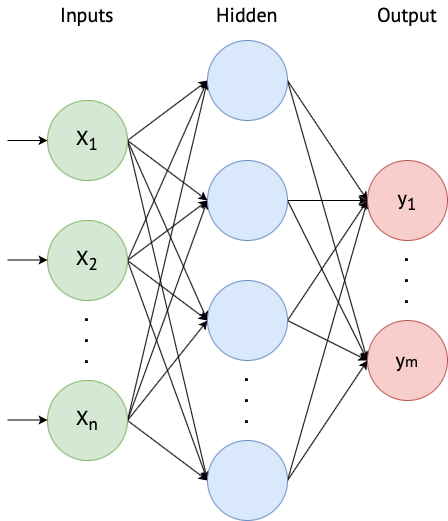

## Embedding Layer

A Word Embedding is a vector that represents a word in numeric form. This vector is not just a random number or a random vector. It captures the semantics, synatical similarity and relation to other words in the dataset. This is vital to allow a machine to better understand each review.

This is exactly what an Embedding layer does, it learns these word embeddings (vectors) for each word, and we will use one in our model!


## LSTM Layer

Simply put, an LSTM layer is used for sequential data (like a sequence of words). A person reads by understand all the previous words in a sentence (or paragraph, or text) to make sense of the next word. LSTMs do the same thing. They are a neural network that reads the sentence one word at a time (from start to finish). 

For every word the LSTM it has an output. The input for a specific word is the numeric value for that word and the previous words output. The output of the model is the output of the last word.

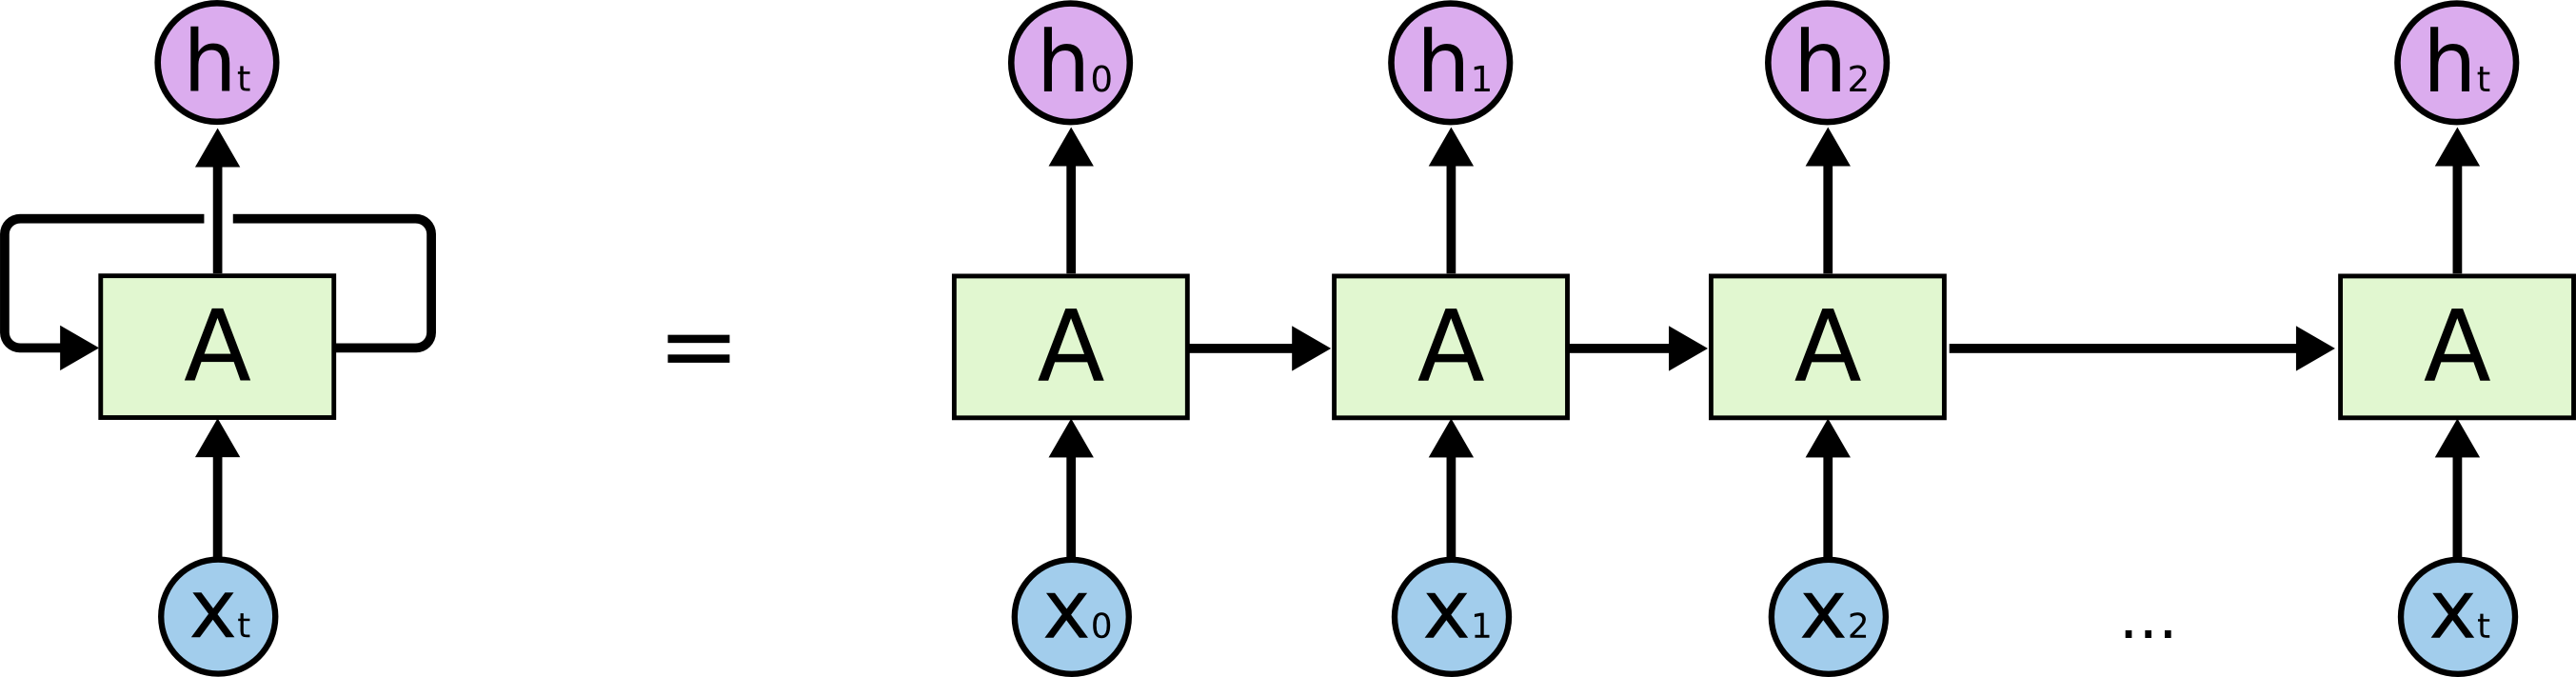

This is hugely imporant. For example the sentence "I am going to the shops" is very different to "I am not going to the shops"

## Our Model

our model is going to consist of an Embedding layer, followed by an LSTM layer and two dense layers. 

Keras is a part of TensorFlow and is used to create models

Lets make it!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Embedding(10000, 16),
    layers.LSTM(128),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### Embedding Layer
The number 100000 refers to the number of words in our dataset after tokenization, i.e. the value N. The number 16 refers to the number of dimensions that the word embedding has. With more dimensions, the word embeddings can represent more information about the word.

### LSTM
The number 128 refers to the number of features that layer has. This number is also a hyperparameter and should be changed to reach the best result

### Dense Layer
Similarly, the number 64 and 1 refers to the number of features that layer has. The number 64 is a hyperparameter but the number 1 is fixed because it is the last layer and we are trying to predict a boolean value, positive or negative. The activation function is used to increase performance of the model, we wont get to much into it.

### How to we make the model learn?

we need to tell the computer how to learn! We do this by having the model predict the output from a given input and seeing how wrong it is. Then it goes back and makes changes based on how wrong it was!

Since we only have two hours, let's not focus on the details here and take this as a given.

In [ ]:
model.compile(loss='binary_crossentropy', # finds out how wrong a prediction is
              optimizer="adam", # Learns from the mistakes
              metrics=['accuracy']) # A way to gauge performce

Lets train the model!

We need to pass the reviews and the labels associated with each model

Epoch - number of times the model goes over the entire dataset

validation_split - this is to split the data to peek at how the model does on data that it has not seen. The validation data is not used to train the model.

In [ ]:
history = model.fit(train_padded, train_labels, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 27s 22ms/step - loss: 0.5580 - accuracy: 0.6954 - val_loss: 0.6045 - val_accuracy: 0.6815
Epoch 2/10
1125/1125 [==============================] - 25s 22ms/step - loss: 0.3983 - accuracy: 0.8124 - val_loss: 0.6096 - val_accuracy: 0.6547
Epoch 3/10
1125/1125 [==============================] - 25s 22ms/step - loss: 0.3627 - accuracy: 0.8341 - val_loss: 0.5891 - val_accuracy: 0.6618
Epoch 4/10
1125/1125 [==============================] - 25s 22ms/step - loss: 0.3429 - accuracy: 0.8423 - val_loss: 0.7930 - val_accuracy: 0.6815
Epoch 5/10
1125/1125 [==============================] - 25s 22ms/step - loss: 0.3147 - accuracy: 0.8502 - val_loss: 0.4839 - val_accuracy: 0.7977
Epoch 6/10
1125/1125 [==============================] - 25s 22ms/step - loss: 0.2848 - accuracy: 0.8623 - val_loss: 0.7051 - val_accuracy: 0.7138
Epoch 7/10
1125/1125 [==============================] - 25s 22ms/step - loss: 0.2548 - accuracy: 0.8736 - val_loss: 0.9280 -

# Let's check how the model performed on the test data!

Finally, once this is all done, we use the data to see the performance on data that the model has never seen before.

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_reviews_preprocessed)
test_padded = pad_sequences(test_sequences, maxlen=20, padding="post", truncating="post")

prediction_accuracy = model.evaluate(test_padded, test_labels)
print("accuracy on test data: ", prediction_accuracy)

375/375 [==============================] - 2s 6ms/step - loss: 0.8618 - accuracy: 0.7489
accuracy on test data:  [0.8618257641792297, 0.7489166855812073]
